In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
excel = pd.ExcelFile('default of credit card clients.xls')

In [4]:
excel.sheet_names

['Data']

In [8]:
bank = pd.read_excel(excel, 'Data')

In [11]:
bank.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [14]:
bank = pd.read_excel(excel, 'Data', index_col=0, header=1)  # header = linha que sera o cabecalho

In [15]:
bank.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [16]:
bank.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [17]:
continuas = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',\
             'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
# estas sao as colunas continuas
# as demais sao categoricas

C:\Users\br003e\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


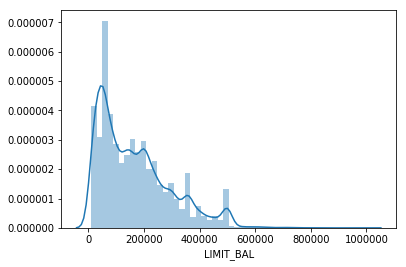

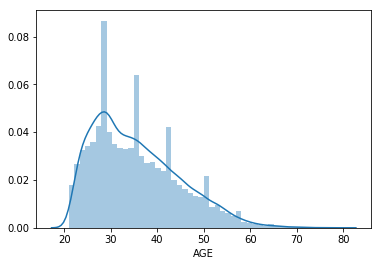

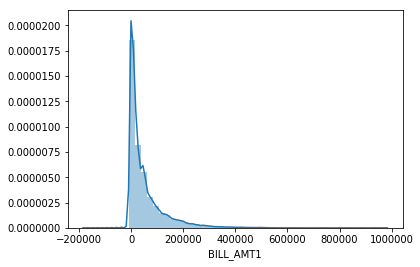

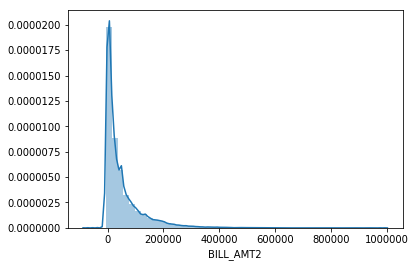

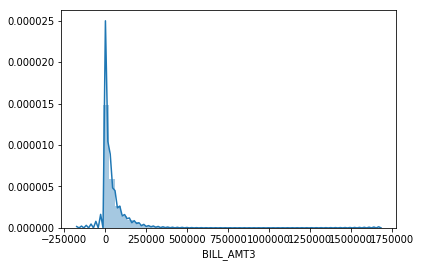

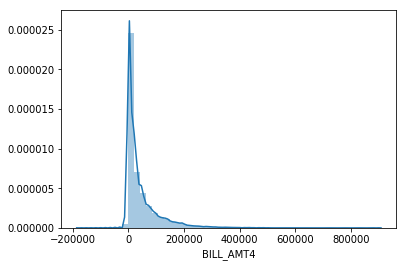

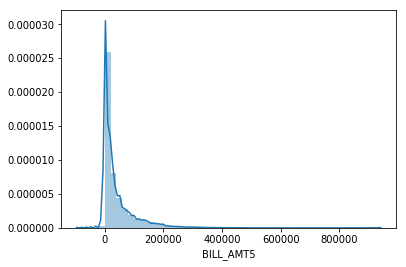

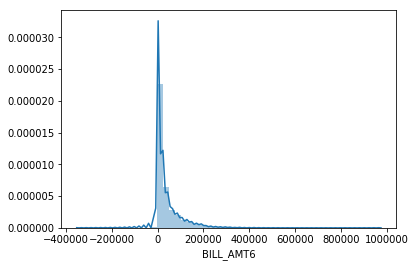

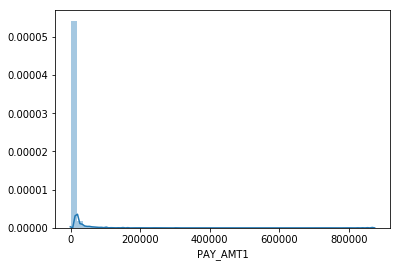

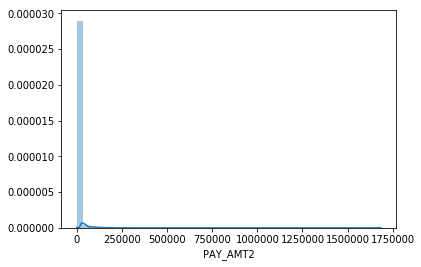

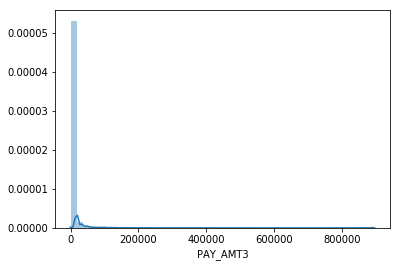

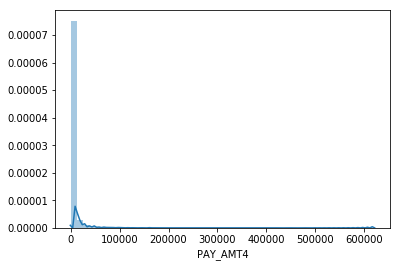

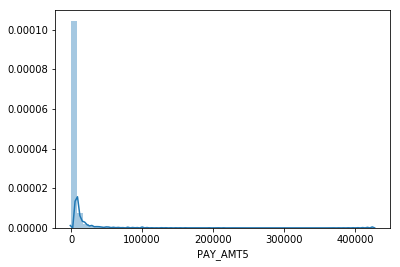

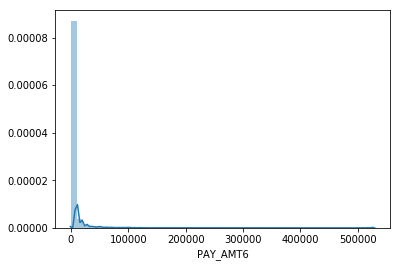

In [18]:
for coluna in continuas:
    plt.figure()
    sns.distplot(bank[coluna])

In [19]:
from sklearn.preprocessing import scale,QuantileTransformer, PowerTransformer

In [20]:
dados_continuos = bank[continuas]

In [21]:
dados_continuos

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,
1,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0
2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
6,50000,37,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800
7,500000,29,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
8,100000,23,11876,380,601,221,-159,567,380,601,0,581,1687,1542
9,140000,28,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000


In [23]:
qt = QuantileTransformer(output_distribution='normal')

In [24]:
centralizado = scale(dados_continuos)
stardatizado = qt.fit_transform(dados_continuos)

C:\Users\br003e\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [26]:
centralizado = pd.DataFrame(data=centralizado, columns=continuas, index=bank.index)
stardatizado = pd.DataFrame(data=centralizado, columns=continuas, index=bank.index)

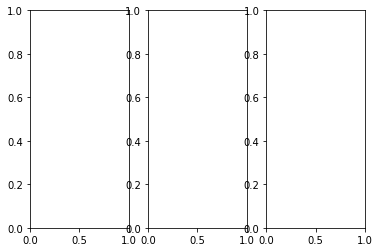

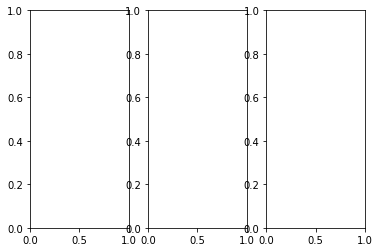

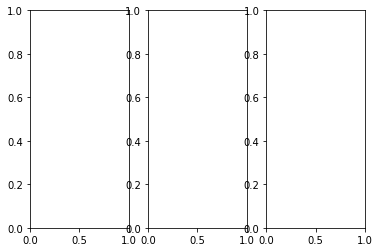

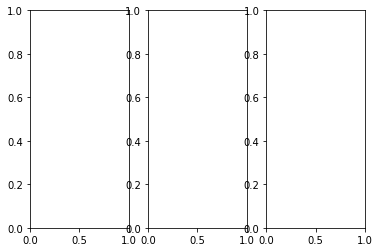

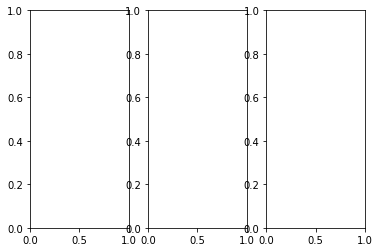

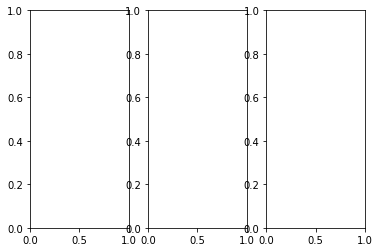

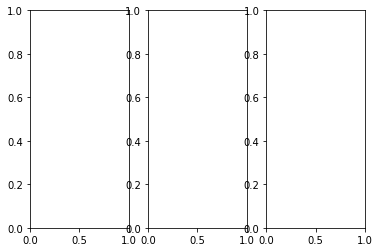

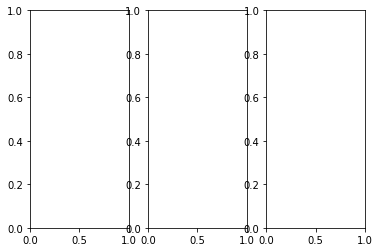

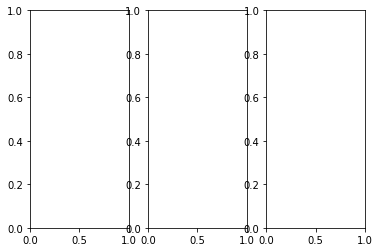

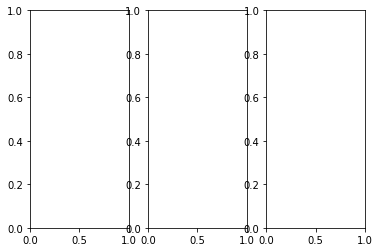

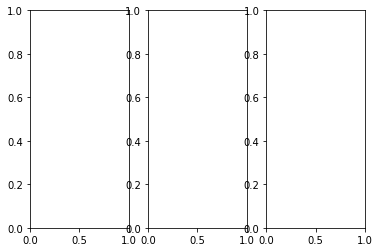

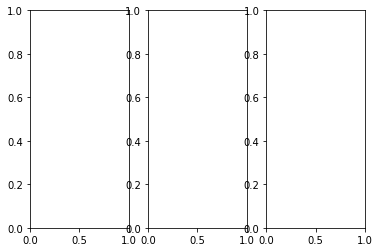

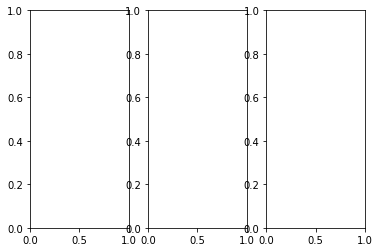

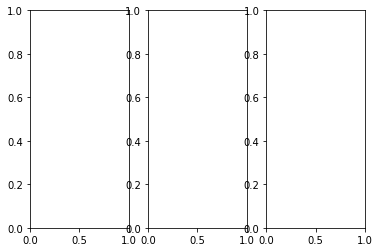

In [32]:
for coluna in continuas:
    fig, axes = plt.subplots(ncols=3, nrows=1)

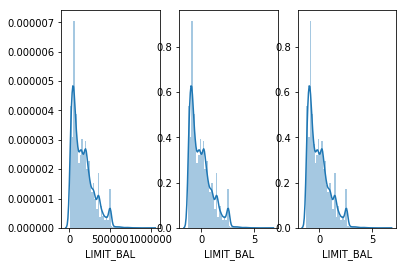

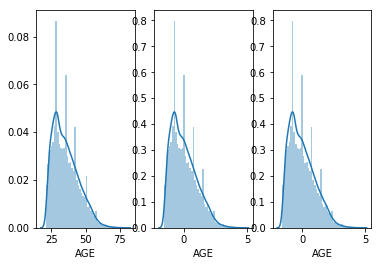

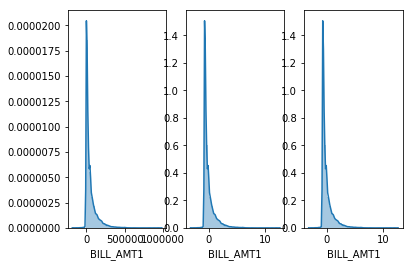

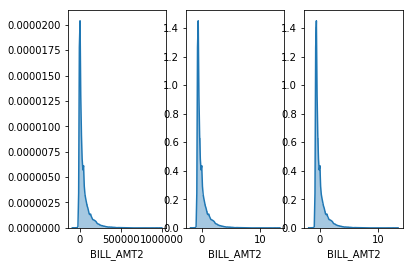

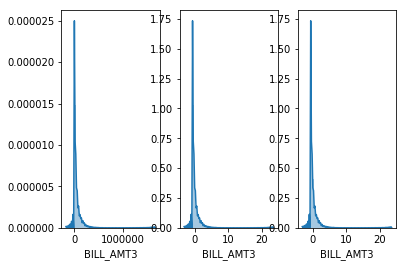

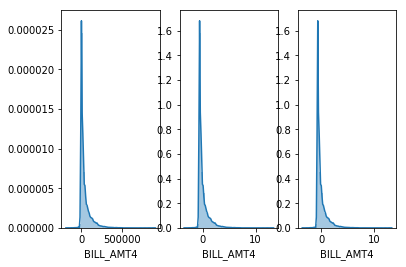

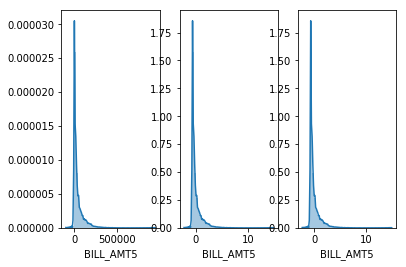

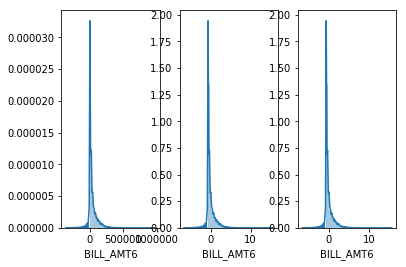

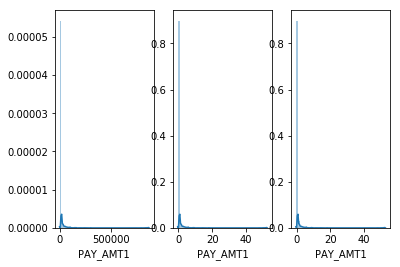

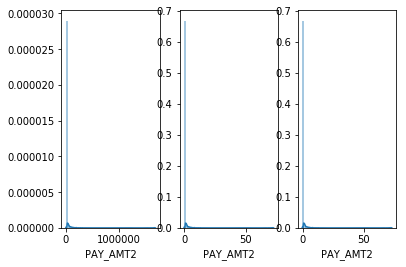

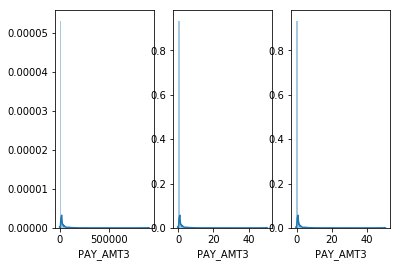

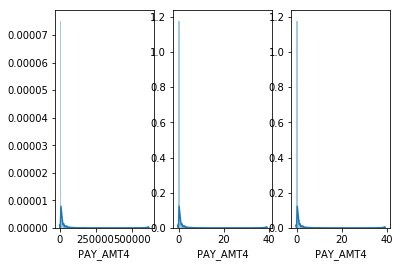

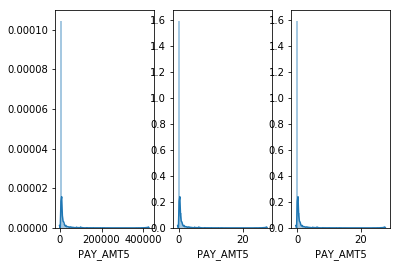

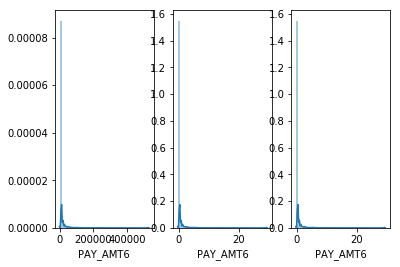

In [34]:
for coluna in continuas:
    fig, axes = plt.subplots(ncols=3, nrows=1)
    sns.distplot(bank[coluna], ax=axes[0])
    sns.distplot(centralizado[coluna], ax=axes[1])  # esta como desvio padrao
    sns.distplot(stardatizado[coluna], ax=axes[2])  # esta com scala normal

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [37]:
bank.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [38]:
discretas =['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [39]:
Centralizado = pd.concat([bank[discretas], centralizado], axis=1)
Stardatizado = pd.concat([bank[discretas], stardatizado], axis=1)

In [44]:
X = bank.drop('default payment next month', axis=1)
y = bank['default payment next month']

In [46]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y)
C_treino, C_teste, c_treino, c_teste = train_test_split(Centralizado,y)
S_treino, S_teste, s_treino, s_teste = train_test_split(Stardatizado,y)

In [60]:
modelo = GaussianNB()
modelo.fit(X_treino, y_treino)
y_pred = modelo.predict(X_teste)
print('Acuracia', accuracy_score(y_teste,y_pred), 'n\-------')
print(classification_report(y_teste,y_pred))

Acuracia 0.3664 n\-------
              precision    recall  f1-score   support

           0       0.88      0.22      0.35      5845
           1       0.24      0.90      0.38      1655

   micro avg       0.37      0.37      0.37      7500
   macro avg       0.56      0.56      0.37      7500
weighted avg       0.74      0.37      0.36      7500



In [61]:
modelo = GaussianNB()
modelo.fit(C_treino, c_treino)
c_pred = modelo.predict(C_teste)
print('Acuracia', accuracy_score(c_teste,c_pred), 'n\-------')
print(classification_report(c_teste,c_pred))

Acuracia 0.7296 n\-------
              precision    recall  f1-score   support

           0       0.88      0.76      0.81      5830
           1       0.43      0.64      0.51      1670

   micro avg       0.73      0.73      0.73      7500
   macro avg       0.65      0.70      0.66      7500
weighted avg       0.78      0.73      0.75      7500



In [62]:
modelo = GaussianNB()
modelo.fit(S_treino, s_treino)
s_pred = modelo.predict(S_teste)
print('Acuracia', accuracy_score(s_teste,s_pred), 'n\-------')
print(classification_report(s_teste,s_pred))

Acuracia 0.7054666666666667 n\-------
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      5864
           1       0.40      0.66      0.50      1636

   micro avg       0.71      0.71      0.71      7500
   macro avg       0.64      0.69      0.64      7500
weighted avg       0.78      0.71      0.73      7500



In [77]:
bankFull = pd.read_csv('bank-full.csv',sep=';')

In [78]:
bankFull.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [79]:
bankFull.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [83]:
bankFull.job.astype('category')

0           management
1           technician
2         entrepreneur
3          blue-collar
4              unknown
5           management
6           management
7         entrepreneur
8              retired
9           technician
10              admin.
11              admin.
12          technician
13          technician
14            services
15             retired
16              admin.
17         blue-collar
18             retired
19            services
20         blue-collar
21          management
22         blue-collar
23            services
24             retired
25              admin.
26          management
27        entrepreneur
28          management
29          technician
             ...      
45181      blue-collar
45182       technician
45183          retired
45184          retired
45185         services
45186          unknown
45187         services
45188       management
45189         services
45190      blue-collar
45191          retired
45192       management
45193    se

In [84]:
# Transforme o conteudo da coluna de categorias para numerico
bankFull.job.astype('category').cat.codes

0         4
1         9
2         2
3         1
4        11
5         4
6         4
7         2
8         5
9         9
10        0
11        0
12        9
13        9
14        7
15        5
16        0
17        1
18        5
19        7
20        1
21        4
22        1
23        7
24        5
25        0
26        4
27        2
28        4
29        9
         ..
45181     1
45182     9
45183     5
45184     5
45185     7
45186    11
45187     7
45188     4
45189     7
45190     1
45191     5
45192     4
45193     6
45194     4
45195     5
45196     8
45197     4
45198     4
45199     1
45200     9
45201     4
45202     0
45203     8
45204     5
45205     9
45206     9
45207     5
45208     5
45209     1
45210     2
Length: 45211, dtype: int8

In [85]:
discretas = ['job', 'marital', 'education', 'default','housing','loan', 'contact', 'day', 'month',\
             'campaign','pdays','previous', 'poutcome', 'y']
continuas = ['age','balance','duration']

C:\Users\br003e\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


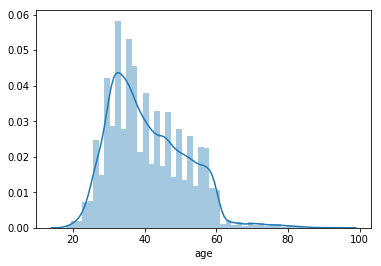

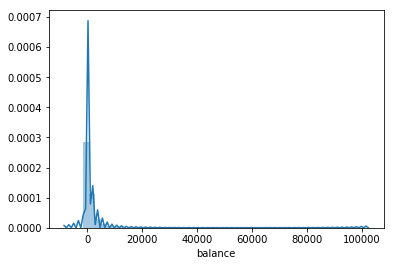

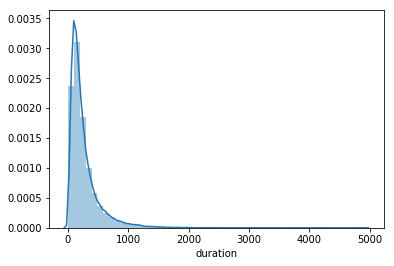

In [89]:
for coluna in continuas:
    plt.figure()
    sns.distplot(bankFull[coluna])

In [91]:
#Centralizado = pd.concat([bankFull[continuas], centralizado], axis=1)
Stardatizado = qt.fit_transform([bankFull[continuas]

SyntaxError: unexpected EOF while parsing (<ipython-input-91-511c0b260b4d>, line 2)

In [ ]:
## NAO TERMINADO ##